### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Bussiness Goel

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Note: Install category enconder in case of not exist on system
Used for binary encoding with high cardinality values.

In [1237]:
#install it 
# pip install category_encoders

In [1238]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

### Data Understanding and Prepration

In [1239]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1240]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [1241]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [1242]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1243]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1244]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [1245]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [1246]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1247]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1248]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1249]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [1250]:
#Drop Alley column because more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])

In [1251]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [1252]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [1253]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [1254]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [1255]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [1256]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [1257]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [1258]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [1259]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [1260]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [1261]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [1262]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [1263]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [1264]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [1265]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [1266]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [1267]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [1268]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [1269]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [1270]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [1271]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [1272]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [1273]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [1274]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [1275]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [1276]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [1277]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [1278]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [1279]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [1280]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [1281]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [1282]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [1283]:
for c in house_data.columns:
    if house_data[c].dtype == np :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [1284]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [1285]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [1286]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [1287]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1288]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [1289]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1290]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [1291]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1292]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [1293]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [1294]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1295]:
# data_encoded=encoder.fit_transform(house_data) 
# data_encoded

In [1296]:
#create dummy variable for Condition1
# Condition1_df = pd.get_dummies(house_data['Condition1'],drop_first=True, prefix='Condition1')
# #concat Condition1_df with main house_data df
# house_data = pd.concat([house_data,Condition1_df],axis=1)
# house_data.head()

In [1297]:
# #create dummy variable for Condition1
# BldgType_df = pd.get_dummies(house_data['BldgType'],drop_first=True, prefix='BldgType')
# #concat BldgType_df with main house_data df
# house_data = pd.concat([house_data,BldgType_df],axis=1)
# house_data.head()

In [1298]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1299]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [1300]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1301]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [1302]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [1303]:
# #create dummy variable for ExterQual
# ExterQual_df = pd.get_dummies(house_data['ExterQual'],drop_first=True, prefix='ExterQual')
# #concat ExterQual_df with main house_data df
# house_data = pd.concat([house_data,ExterQual_df],axis=1)
# house_data.head()

In [1304]:
# #create dummy variable for ExterCond
# ExterCond_df = pd.get_dummies(house_data['ExterCond'],drop_first=True, prefix='ExterCond')
# #concat ExterCond_df with main house_data df
# house_data = pd.concat([house_data,ExterCond_df],axis=1)
# house_data.head()

In [1305]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [1306]:
# #create dummy variable for BsmtQual
# BsmtQual_df = pd.get_dummies(house_data['BsmtQual'],drop_first=True, prefix='BsmtQual')
# #concat BsmtQual_df with main house_data df
# house_data = pd.concat([house_data,BsmtQual_df],axis=1)
# house_data.head()

In [1307]:
# #create dummy variable for BsmtExposure
# BsmtExposure_df = pd.get_dummies(house_data['BsmtExposure'],drop_first=True, prefix='BsmtExposure')
# #concat BsmtExposure_df with main house_data df
# house_data = pd.concat([house_data,BsmtExposure_df],axis=1)
# house_data.head()

In [1308]:
# #create dummy variable for BsmtFinType1
# BsmtFinType1_df = pd.get_dummies(house_data['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1')
# #concat BsmtFinType1_df with main house_data df
# house_data = pd.concat([house_data,BsmtFinType1_df],axis=1)
# house_data.head()

In [1309]:
# #create dummy variable for BsmtFinType2
# BsmtFinType2_df = pd.get_dummies(house_data['BsmtFinType2'],drop_first=True, prefix='BsmtFinType2')
# #concat BsmtFinType2_df with main house_data df
# house_data = pd.concat([house_data,BsmtFinType2_df],axis=1)
# house_data.head()

In [1310]:
# #create dummy variable for HeatingQC
# HeatingQC_df = pd.get_dummies(house_data['HeatingQC'],drop_first=True, prefix='HeatingQC')
# #concat HeatingQC_df with main house_data df
# house_data = pd.concat([house_data,HeatingQC_df],axis=1)
# house_data.head()

In [1311]:
# #create dummy variable for KitchenQual
# KitchenQual_df = pd.get_dummies(house_data['KitchenQual'],drop_first=True, prefix='KitchenQual')
# #concat KitchenQual_df with main house_data df
# house_data = pd.concat([house_data,KitchenQual_df],axis=1)
# house_data.head()

In [1312]:
# #create dummy variable for FireplaceQu
# FireplaceQu_df = pd.get_dummies(house_data['FireplaceQu'],drop_first=True, prefix='FireplaceQu')
# #concat FireplaceQu_df with main house_data df
# house_data = pd.concat([house_data,FireplaceQu_df],axis=1)
# house_data.head()

In [1313]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1314]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [1315]:
# #create dummy variable for SaleType
# SaleType_df = pd.get_dummies(house_data['SaleType'],drop_first=True, prefix='SaleType')
# #concat SaleType_df with main house_data df
# house_data = pd.concat([house_data,SaleType_df],axis=1)
# house_data.head()

In [1316]:
# #create dummy variable for SaleCondition
# SaleCondition_df = pd.get_dummies(house_data['SaleCondition'],drop_first=True, prefix='SaleCondition')
# #concat SaleCondition_df with main house_data df
# house_data = pd.concat([house_data,SaleCondition_df],axis=1)
# house_data.head()

In [1317]:
house_data.shape

(1460, 162)

In [1318]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [1319]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.8 KB


In [1320]:
# #check the correaltion with new columns with heatmap
# plt.figure(figsize=(100,85))
# sns.heatmap(house_data.corr(), annot =True, cmap="YlGnBu")
# plt.show()

### Prepairing Data For Modeling

In [1321]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [1322]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

### Rescalling The Numeric Factors

In [1323]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [1324]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

### Training The Model

In [1325]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1326]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [1327]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [1328]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', False, 55),
 ('OverallQual', True, 1),
 ('OverallCond', False, 7),
 ('YearRemodAdd', False, 14),
 ('MasVnrArea', False, 22),
 ('ExterQual', False, 65),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 67),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 69),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 9),
 ('BsmtHalfBath', False, 74),
 ('FullBath', False, 35),
 ('HalfBath', False, 42),
 ('BedroomAbvGr', False, 37),
 ('KitchenAbvGr', False, 47),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 30),
 ('Fireplaces', False, 2),
 ('FireplaceQu', False, 62),
 ('GarageYrBlt', False, 6),
 ('GarageCars', True, 1),
 ('GarageArea', False, 53),
 ('WoodDeckSF', False, 46),
 ('OpenPorchSF', False, 71),
 ('EnclosedPorch', False, 49),
 ('3SsnPorch', False, 36),
 ('ScreenPorc

In [1329]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn',
     

In [1330]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_180', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_SLvl', 'RoofStyle_Gable',


### Building model using statsmodel, for the detailed statistics

In [1331]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [1332]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [1333]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [1334]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:29:17   Log-Likelihood:                -11991.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     952   BIC:                         2.446e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.468e+05   1.42e+04     10.314      0.000    1.19e+05    1.75e+05
LotFrontage          -3707.0622   1359.817     -2.726      0.007   -6375.648   -1038.477
OverallQual           1.834e+04   1955.786      9.377      0.000    1.45e+04    2.22e+04
BsmtQual              9497.2760   1974.293      4.810      0.000    5622.807    1.34e+04
BsmtExposure          8308.0010   1254.267      6.624      0.000    5846.553    1.08e+04
BsmtFinSF1            3060.8245   1070.086      2.860      0.004     960.825    5160.824
BsmtFinSF2             392.8587   1034.697      0.380      0.704   -1637.691    2423.408
BsmtUnfSF            -2731.1950   1056.136     -2.586      0.010   -4803.819    -658.571
TotalBsmtSF            577.5683   1736.795      0.333      0.740   -2830.820    3985.957
1stFlrSF              9132.5743   1982.611      4.606      0.000    5241.782     1.3e+04
2ndFlrSF              1.118e+04   1712.906      6.527      0.000    7818.590    1.45e+04
LowQualFinSF         -1293.8848   1162.736     -1.113      0.266   -3575.706     987.936
GrLivArea             1.587e+04   1145.487     13.854      0.000    1.36e+04    1.81e+04
KitchenQual           8262.4787   1496.942      5.520      0.000    5324.792    1.12e+04
GarageCars            1.118e+04   1740.253      6.422      0.000    7760.825    1.46e+04
MSSubClass_45        -2.497e+04   2.54e+04     -0.982      0.326   -7.49e+04    2.49e+04
MSSubClass_75         2.431e+04   2.02e+04      1.205      0.229   -1.53e+04    6.39e+04
MSSubClass_85         5241.4911   1.43e+04      0.368      0.713   -2.27e+04    3.32e+04
MSSubClass_90        -2.096e+04   6329.709     -3.311      0.001   -3.34e+04   -8535.333
MSSubClass_120       -2.445e+04   4970.784     -4.919      0.000   -3.42e+04   -1.47e+04
MSSubClass_160       -3.549e+04   7531.270     -4.712      0.000   -5.03e+04   -2.07e+04
MSSubClass_190        -1.33e+04   7077.078     -1.879      0.061   -2.72e+04     591.193
MSZoning_FV           2.487e+04   1.62e+04      1.533      0.126   -6972.780    5.67e+04
MSZoning_RH           3.254e+04   1.55e+04      2.095      0.036    2052.559     6.3e+04
MSZoning_RL           2.842e+04   1.29e+04      2.209      0.027    3177.938    5.37e+04
MSZoning_RM           1.957e+04   1.31e+04      1.493      0.136   -6155.065    4.53e+04
LotConfig_FR2        -1.483e+04   5994.136     -2.474      0.014   -2.66e+04   -3063.708
Neighborhood_BrDale   1.832e+04   1.23e+04      1.493      0.136   -5759.098    4.24e+04
Neighborhood_BrkSide  8154.4706   5828.736      1.399      0.162   -3284.185    1.96e+04
Neighborhood_ClearCr  1.439e+04   7728.852      1.861      0.063    -782.019    2.96e+04
Neighborhood_Crawfor  3.423e+04   6150.383      5.565      0.000    2.22e+04    4.63e+04
Neighborhood_MeadowV -3082.5991   1.43e+04     -0.215    

In [1335]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,GrLivArea,inf
55,Exterior2nd_CBlock,inf
72,GarageFinish_NA,inf
71,GarageType_NA,inf
42,Exterior1st_AsphShn,inf
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
9,1stFlrSF,inf


___GrLivArea has higher p-value. Lets drop it.___

In [1336]:
X_train_new = X_train_rfe.drop(['GrLivArea'],axis=1)

In [1337]:
X_train_new.columns

Index(['const', 'LotFrontage', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn',
       'E

___Rebuild the model without Exterior2nd_CBlock___

In [1338]:
X_train_lm = sm.add_constant(X_train_new)

In [1339]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1340]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:29:21   Log-Likelihood:                -11991.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     952   BIC:                         2.446e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.468e+05   1.42e+04     10.314      0.000    1.19e+05    1.75e+05
LotFrontage          -3707.0622   1359.817     -2.726      0.007   -6375.648   -1038.477
OverallQual           1.834e+04   1955.786      9.377      0.000    1.45e+04    2.22e+04
BsmtQual              9497.2760   1974.293      4.810      0.000    5622.807    1.34e+04
BsmtExposure          8308.0010   1254.267      6.624      0.000    5846.553    1.08e+04
BsmtFinSF1            3060.8245   1070.086      2.860      0.004     960.825    5160.824
BsmtFinSF2             392.8587   1034.697      0.380      0.704   -1637.691    2423.408
BsmtUnfSF            -2731.1950   1056.136     -2.586      0.010   -4803.819    -658.571
TotalBsmtSF            577.5683   1736.795      0.333      0.740   -2830.820    3985.957
1stFlrSF              2.101e+04   2491.534      8.431      0.000    1.61e+04    2.59e+04
2ndFlrSF              2.417e+04   2213.468     10.922      0.000    1.98e+04    2.85e+04
LowQualFinSF           144.5878   1165.688      0.124      0.901   -2143.026    2432.202
KitchenQual           8262.4787   1496.942      5.520      0.000    5324.792    1.12e+04
GarageCars            1.118e+04   1740.253      6.422      0.000    7760.825    1.46e+04
MSSubClass_45        -2.497e+04   2.54e+04     -0.982      0.326   -7.49e+04    2.49e+04
MSSubClass_75         2.431e+04   2.02e+04      1.205      0.229   -1.53e+04    6.39e+04
MSSubClass_85         5241.4911   1.43e+04      0.368      0.713   -2.27e+04    3.32e+04
MSSubClass_90        -2.096e+04   6329.709     -3.311      0.001   -3.34e+04   -8535.333
MSSubClass_120       -2.445e+04   4970.784     -4.919      0.000   -3.42e+04   -1.47e+04
MSSubClass_160       -3.549e+04   7531.270     -4.712      0.000   -5.03e+04   -2.07e+04
MSSubClass_190        -1.33e+04   7077.078     -1.879      0.061   -2.72e+04     591.193
MSZoning_FV           2.487e+04   1.62e+04      1.533      0.126   -6972.780    5.67e+04
MSZoning_RH           3.254e+04   1.55e+04      2.095      0.036    2052.559     6.3e+04
MSZoning_RL           2.842e+04   1.29e+04      2.209      0.027    3177.938    5.37e+04
MSZoning_RM           1.957e+04   1.31e+04      1.493      0.136   -6155.065    4.53e+04
LotConfig_FR2        -1.483e+04   5994.136     -2.474      0.014   -2.66e+04   -3063.708
Neighborhood_BrDale   1.832e+04   1.23e+04      1.493      0.136   -5759.098    4.24e+04
Neighborhood_BrkSide  8154.4706   5828.736      1.399      0.162   -3284.185    1.96e+04
Neighborhood_ClearCr  1.439e+04   7728.852      1.861      0.063    -782.019    2.96e+04
Neighborhood_Crawfor  3.423e+04   6150.383      5.565      0.000    2.22e+04    4.63e+04
Neighborhood_MeadowV -3082.5991   1.43e+04     -0.215      0.830   -3.12e+04    2.51e+04
Neighborhood_NoRidge  5.919e+04   6379.780      9.278    

___Exterior2nd_CBlock has higher p-value. Lets drop it.___

In [1341]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

___Rebuild the model without Exterior2nd_CBlock___

In [1342]:
X_train_lm = sm.add_constant(X_train_new)

In [1343]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1344]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:29:24   Log-Likelihood:                -11991.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     952   BIC:                         2.446e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.468e+05   1.42e+04     10.314      0.000    1.19e+05    1.75e+05
LotFrontage          -3707.0622   1359.817     -2.726      0.007   -6375.648   -1038.477
OverallQual           1.834e+04   1955.786      9.377      0.000    1.45e+04    2.22e+04
BsmtQual              9497.2760   1974.293      4.810      0.000    5622.807    1.34e+04
BsmtExposure          8308.0010   1254.267      6.624      0.000    5846.553    1.08e+04
BsmtFinSF1            3060.8245   1070.086      2.860      0.004     960.825    5160.824
BsmtFinSF2             392.8587   1034.697      0.380      0.704   -1637.691    2423.408
BsmtUnfSF            -2731.1950   1056.136     -2.586      0.010   -4803.819    -658.571
TotalBsmtSF            577.5683   1736.795      0.333      0.740   -2830.820    3985.957
1stFlrSF              2.101e+04   2491.534      8.431      0.000    1.61e+04    2.59e+04
2ndFlrSF              2.417e+04   2213.468     10.922      0.000    1.98e+04    2.85e+04
LowQualFinSF           144.5878   1165.688      0.124      0.901   -2143.026    2432.202
KitchenQual           8262.4787   1496.942      5.520      0.000    5324.792    1.12e+04
GarageCars            1.118e+04   1740.253      6.422      0.000    7760.825    1.46e+04
MSSubClass_45        -2.497e+04   2.54e+04     -0.982      0.326   -7.49e+04    2.49e+04
MSSubClass_75         2.431e+04   2.02e+04      1.205      0.229   -1.53e+04    6.39e+04
MSSubClass_85         5241.4911   1.43e+04      0.368      0.713   -2.27e+04    3.32e+04
MSSubClass_90        -2.096e+04   6329.709     -3.311      0.001   -3.34e+04   -8535.333
MSSubClass_120       -2.445e+04   4970.784     -4.919      0.000   -3.42e+04   -1.47e+04
MSSubClass_160       -3.549e+04   7531.270     -4.712      0.000   -5.03e+04   -2.07e+04
MSSubClass_190        -1.33e+04   7077.078     -1.879      0.061   -2.72e+04     591.193
MSZoning_FV           2.487e+04   1.62e+04      1.533      0.126   -6972.780    5.67e+04
MSZoning_RH           3.254e+04   1.55e+04      2.095      0.036    2052.559     6.3e+04
MSZoning_RL           2.842e+04   1.29e+04      2.209      0.027    3177.938    5.37e+04
MSZoning_RM           1.957e+04   1.31e+04      1.493      0.136   -6155.065    4.53e+04
LotConfig_FR2        -1.483e+04   5994.136     -2.474      0.014   -2.66e+04   -3063.708
Neighborhood_BrDale   1.832e+04   1.23e+04      1.493      0.136   -5759.098    4.24e+04
Neighborhood_BrkSide  8154.4706   5828.736      1.399      0.162   -3284.185    1.96e+04
Neighborhood_ClearCr  1.439e+04   7728.852      1.861      0.063    -782.019    2.96e+04
Neighborhood_Crawfor  3.423e+04   6150.383      5.565      0.000    2.22e+04    4.63e+04
Neighborhood_MeadowV -3082.5991   1.43e+04     -0.215      0.830   -3.12e+04    2.51e+04
Neighborhood_NoRidge  5.919e+04   6379.780      9.278    

___GarageFinish_NA has higher p-value. Lets drop it.___

In [1346]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

___Rebuild the model without GarageFinish_NA___

In [1347]:
X_train_lm = sm.add_constant(X_train_new)

In [1348]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1349]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:35   Log-Likelihood:                -11991.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     952   BIC:                         2.446e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.468e+05   1.42e+04     10.314      0.000    1.19e+05    1.75e+05
LotFrontage          -3707.0622   1359.817     -2.726      0.007   -6375.648   -1038.477
OverallQual           1.834e+04   1955.786      9.377      0.000    1.45e+04    2.22e+04
BsmtQual              9497.2760   1974.293      4.810      0.000    5622.807    1.34e+04
BsmtExposure          8308.0010   1254.267      6.624      0.000    5846.553    1.08e+04
BsmtFinSF1            3060.8245   1070.086      2.860      0.004     960.825    5160.824
BsmtFinSF2             392.8587   1034.697      0.380      0.704   -1637.691    2423.408
BsmtUnfSF            -2731.1950   1056.136     -2.586      0.010   -4803.819    -658.571
TotalBsmtSF            577.5683   1736.795      0.333      0.740   -2830.820    3985.957
1stFlrSF              2.101e+04   2491.534      8.431      0.000    1.61e+04    2.59e+04
2ndFlrSF              2.417e+04   2213.468     10.922      0.000    1.98e+04    2.85e+04
LowQualFinSF           144.5878   1165.688      0.124      0.901   -2143.026    2432.202
KitchenQual           8262.4787   1496.942      5.520      0.000    5324.792    1.12e+04
GarageCars            1.118e+04   1740.253      6.422      0.000    7760.825    1.46e+04
MSSubClass_45        -2.497e+04   2.54e+04     -0.982      0.326   -7.49e+04    2.49e+04
MSSubClass_75         2.431e+04   2.02e+04      1.205      0.229   -1.53e+04    6.39e+04
MSSubClass_85         5241.4911   1.43e+04      0.368      0.713   -2.27e+04    3.32e+04
MSSubClass_90        -2.096e+04   6329.709     -3.311      0.001   -3.34e+04   -8535.333
MSSubClass_120       -2.445e+04   4970.784     -4.919      0.000   -3.42e+04   -1.47e+04
MSSubClass_160       -3.549e+04   7531.270     -4.712      0.000   -5.03e+04   -2.07e+04
MSSubClass_190        -1.33e+04   7077.078     -1.879      0.061   -2.72e+04     591.193
MSZoning_FV           2.487e+04   1.62e+04      1.533      0.126   -6972.780    5.67e+04
MSZoning_RH           3.254e+04   1.55e+04      2.095      0.036    2052.559     6.3e+04
MSZoning_RL           2.842e+04   1.29e+04      2.209      0.027    3177.938    5.37e+04
MSZoning_RM           1.957e+04   1.31e+04      1.493      0.136   -6155.065    4.53e+04
LotConfig_FR2        -1.483e+04   5994.136     -2.474      0.014   -2.66e+04   -3063.708
Neighborhood_BrDale   1.832e+04   1.23e+04      1.493      0.136   -5759.098    4.24e+04
Neighborhood_BrkSide  8154.4706   5828.736      1.399      0.162   -3284.185    1.96e+04
Neighborhood_ClearCr  1.439e+04   7728.852      1.861      0.063    -782.019    2.96e+04
Neighborhood_Crawfor  3.423e+04   6150.383      5.565      0.000    2.22e+04    4.63e+04
Neighborhood_MeadowV -3082.5991   1.43e+04     -0.215      0.830   -3.12e+04    2.51e+04
Neighborhood_NoRidge  5.919e+04   6379.780      9.278    

___GarageType_NA has higher p-value. Lets drop it.___

In [1350]:
X_train_new = X_train_new.drop(['GarageType_NA'],axis=1)

___Rebuild the model without GarageType_NA___

In [1351]:
X_train_lm = sm.add_constant(X_train_new)

In [1352]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1353]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     80.91
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:37   Log-Likelihood:                -11993.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     953   BIC:                         2.446e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.537e+05   1.39e+04     11.047      0.000    1.26e+05    1.81e+05
LotFrontage          -3762.1561   1362.192     -2.762      0.006   -6435.399   -1088.914
OverallQual           1.812e+04   1957.013      9.261      0.000    1.43e+04     2.2e+04
BsmtQual              9346.6056   1976.855      4.728      0.000    5467.114    1.32e+04
BsmtExposure          8433.6075   1255.328      6.718      0.000    5970.081    1.09e+04
BsmtFinSF1            3136.0109   1071.576      2.927      0.004    1033.089    5238.933
BsmtFinSF2             344.8243   1036.447      0.333      0.739   -1689.157    2378.806
BsmtUnfSF            -2509.1477   1053.145     -2.383      0.017   -4575.898    -442.397
TotalBsmtSF            852.9018   1735.444      0.491      0.623   -2552.831    4258.634
1stFlrSF              2.094e+04   2496.162      8.390      0.000     1.6e+04    2.58e+04
2ndFlrSF              2.356e+04   2199.085     10.712      0.000    1.92e+04    2.79e+04
LowQualFinSF           424.2910   1160.704      0.366      0.715   -1853.540    2702.122
KitchenQual           8214.0301   1499.652      5.477      0.000    5271.029    1.12e+04
GarageCars            9265.7476   1501.811      6.170      0.000    6318.510    1.22e+04
MSSubClass_45        -2.045e+04   2.54e+04     -0.805      0.421   -7.03e+04    2.94e+04
MSSubClass_75         2.493e+04   2.02e+04      1.233      0.218   -1.47e+04    6.46e+04
MSSubClass_85         4764.4636   1.43e+04      0.334      0.739   -2.33e+04    3.28e+04
MSSubClass_90        -1.878e+04   6261.037     -3.000      0.003   -3.11e+04   -6493.443
MSSubClass_120       -2.502e+04   4973.421     -5.030      0.000   -3.48e+04   -1.53e+04
MSSubClass_160       -3.511e+04   7543.716     -4.655      0.000   -4.99e+04   -2.03e+04
MSSubClass_190       -1.197e+04   7063.780     -1.694      0.091   -2.58e+04    1895.841
MSZoning_FV           2.405e+04   1.63e+04      1.480      0.139   -7847.723    5.59e+04
MSZoning_RH           3.261e+04   1.56e+04      2.095      0.036    2056.715    6.32e+04
MSZoning_RL           2.759e+04   1.29e+04      2.141      0.033    2303.126    5.29e+04
MSZoning_RM           1.916e+04   1.31e+04      1.459      0.145   -6615.809    4.49e+04
LotConfig_FR2        -1.455e+04   6004.279     -2.423      0.016   -2.63e+04   -2765.976
Neighborhood_BrDale   1.763e+04   1.23e+04      1.435      0.152   -6484.978    4.18e+04
Neighborhood_BrkSide  8168.1951   5839.940      1.399      0.162   -3292.432    1.96e+04
Neighborhood_ClearCr  1.437e+04   7743.708      1.855      0.064    -828.638    2.96e+04
Neighborhood_Crawfor  3.413e+04   6162.054      5.539      0.000     2.2e+04    4.62e+04
Neighborhood_MeadowV -3611.7768   1.44e+04     -0.251      0.802   -3.18e+04    2.46e+04
Neighborhood_NoRidge  6.067e+04   6355.296      9.546    

In [1354]:
X_train_new.shape

(1021, 71)

In [1355]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
41,Exterior1st_AsphShn,inf
51,Exterior2nd_AsphShn,inf
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
0,const,197.32
23,MSZoning_RL,28.52
57,Exterior2nd_MetalSd,27.26
47,Exterior1st_MetalSd,27.04


___Exterior1st_AsphShn has higher p-value and VIF. Lets drop it.___

In [1356]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

___Rebuild the model without Exterior1st_AsphShn___

In [1357]:
X_train_lm = sm.add_constant(X_train_new)

In [1358]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1359]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     80.91
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:39   Log-Likelihood:                -11993.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     953   BIC:                         2.446e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.537e+05   1.39e+04     11.047      0.000    1.26e+05    1.81e+05
LotFrontage          -3762.1561   1362.192     -2.762      0.006   -6435.399   -1088.914
OverallQual           1.812e+04   1957.013      9.261      0.000    1.43e+04     2.2e+04
BsmtQual              9346.6056   1976.855      4.728      0.000    5467.114    1.32e+04
BsmtExposure          8433.6075   1255.328      6.718      0.000    5970.081    1.09e+04
BsmtFinSF1            3136.0109   1071.576      2.927      0.004    1033.089    5238.933
BsmtFinSF2             344.8243   1036.447      0.333      0.739   -1689.157    2378.806
BsmtUnfSF            -2509.1477   1053.145     -2.383      0.017   -4575.898    -442.397
TotalBsmtSF            852.9018   1735.444      0.491      0.623   -2552.831    4258.634
1stFlrSF              2.094e+04   2496.162      8.390      0.000     1.6e+04    2.58e+04
2ndFlrSF              2.356e+04   2199.085     10.712      0.000    1.92e+04    2.79e+04
LowQualFinSF           424.2910   1160.704      0.366      0.715   -1853.540    2702.122
KitchenQual           8214.0301   1499.652      5.477      0.000    5271.029    1.12e+04
GarageCars            9265.7476   1501.811      6.170      0.000    6318.510    1.22e+04
MSSubClass_45        -2.045e+04   2.54e+04     -0.805      0.421   -7.03e+04    2.94e+04
MSSubClass_75         2.493e+04   2.02e+04      1.233      0.218   -1.47e+04    6.46e+04
MSSubClass_85         4764.4636   1.43e+04      0.334      0.739   -2.33e+04    3.28e+04
MSSubClass_90        -1.878e+04   6261.037     -3.000      0.003   -3.11e+04   -6493.443
MSSubClass_120       -2.502e+04   4973.421     -5.030      0.000   -3.48e+04   -1.53e+04
MSSubClass_160       -3.511e+04   7543.716     -4.655      0.000   -4.99e+04   -2.03e+04
MSSubClass_190       -1.197e+04   7063.780     -1.694      0.091   -2.58e+04    1895.841
MSZoning_FV           2.405e+04   1.63e+04      1.480      0.139   -7847.723    5.59e+04
MSZoning_RH           3.261e+04   1.56e+04      2.095      0.036    2056.715    6.32e+04
MSZoning_RL           2.759e+04   1.29e+04      2.141      0.033    2303.126    5.29e+04
MSZoning_RM           1.916e+04   1.31e+04      1.459      0.145   -6615.809    4.49e+04
LotConfig_FR2        -1.455e+04   6004.279     -2.423      0.016   -2.63e+04   -2765.976
Neighborhood_BrDale   1.763e+04   1.23e+04      1.435      0.152   -6484.978    4.18e+04
Neighborhood_BrkSide  8168.1951   5839.940      1.399      0.162   -3292.432    1.96e+04
Neighborhood_ClearCr  1.437e+04   7743.708      1.855      0.064    -828.638    2.96e+04
Neighborhood_Crawfor  3.413e+04   6162.054      5.539      0.000     2.2e+04    4.62e+04
Neighborhood_MeadowV -3611.7768   1.44e+04     -0.251      0.802   -3.18e+04    2.46e+04
Neighborhood_NoRidge  6.067e+04   6355.296      9.546    

___Exterior2nd_AsphShn has higher p-value and VIF. Lets drop it.___

In [1360]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

___Rebuild the model without Exterior2nd_AsphShn___

In [1361]:
X_train_lm = sm.add_constant(X_train_new)

In [1362]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1363]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     82.22
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:40   Log-Likelihood:                -11993.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     954   BIC:                         2.445e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.537e+05   1.39e+04     11.060      0.000    1.26e+05    1.81e+05
LotFrontage          -3754.6172   1360.885     -2.759      0.006   -6425.290   -1083.944
OverallQual           1.814e+04   1952.900      9.291      0.000    1.43e+04     2.2e+04
BsmtQual              9309.7226   1965.647      4.736      0.000    5452.232    1.32e+04
BsmtExposure          8432.7759   1254.684      6.721      0.000    5970.516    1.09e+04
BsmtFinSF1            3111.8139   1062.919      2.928      0.003    1025.884    5197.744
BsmtFinSF2             337.9600   1035.249      0.326      0.744   -1693.668    2369.588
BsmtUnfSF            -2539.2010   1039.846     -2.442      0.015   -4579.851    -498.551
TotalBsmtSF            796.4580   1707.190      0.467      0.641   -2553.823    4146.739
1stFlrSF              2.102e+04   2460.391      8.543      0.000    1.62e+04    2.58e+04
2ndFlrSF              2.353e+04   2194.455     10.724      0.000    1.92e+04    2.78e+04
LowQualFinSF           422.1077   1160.055      0.364      0.716   -1854.447    2698.663
KitchenQual           8213.6980   1498.891      5.480      0.000    5272.194    1.12e+04
GarageCars            9246.1007   1497.243      6.175      0.000    6307.831    1.22e+04
MSSubClass_45        -2.047e+04   2.54e+04     -0.806      0.420   -7.03e+04    2.93e+04
MSSubClass_75         2.493e+04   2.02e+04      1.234      0.218   -1.47e+04    6.46e+04
MSSubClass_85         4878.6477   1.43e+04      0.342      0.732   -2.31e+04    3.29e+04
MSSubClass_90        -1.861e+04   6191.897     -3.006      0.003   -3.08e+04   -6462.496
MSSubClass_120         -2.5e+04   4969.823     -5.030      0.000   -3.48e+04   -1.52e+04
MSSubClass_160       -3.509e+04   7539.179     -4.655      0.000   -4.99e+04   -2.03e+04
MSSubClass_190       -1.199e+04   7058.639     -1.699      0.090   -2.58e+04    1858.424
MSZoning_FV           2.404e+04   1.62e+04      1.480      0.139   -7844.167    5.59e+04
MSZoning_RH           3.255e+04   1.56e+04      2.092      0.037    2021.330    6.31e+04
MSZoning_RL           2.757e+04   1.29e+04      2.141      0.033    2297.282    5.28e+04
MSZoning_RM           1.913e+04   1.31e+04      1.458      0.145   -6627.248    4.49e+04
LotConfig_FR2        -1.454e+04   6000.997     -2.423      0.016   -2.63e+04   -2762.556
Neighborhood_BrDale   1.762e+04   1.23e+04      1.434      0.152   -6487.202    4.17e+04
Neighborhood_BrkSide  8170.4436   5836.969      1.400      0.162   -3284.338    1.96e+04
Neighborhood_ClearCr   1.44e+04   7737.801      1.861      0.063    -784.798    2.96e+04
Neighborhood_Crawfor  3.413e+04   6158.861      5.541      0.000     2.2e+04    4.62e+04
Neighborhood_MeadowV -3575.6175   1.44e+04     -0.249      0.803   -3.18e+04    2.46e+04
Neighborhood_NoRidge  6.069e+04   6350.454      9.557    

___BsmtFinSF1 has higher VIF. Lets drop it.___

In [1364]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

___Rebuild the model without BsmtFinSF1___

In [1365]:
X_train_lm = sm.add_constant(X_train_new)

In [1366]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1367]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     82.22
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:41   Log-Likelihood:                -11993.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     954   BIC:                         2.445e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.537e+05   1.39e+04     11.060      0.000    1.26e+05    1.81e+05
LotFrontage          -3754.6172   1360.885     -2.759      0.006   -6425.290   -1083.944
OverallQual           1.814e+04   1952.900      9.291      0.000    1.43e+04     2.2e+04
BsmtQual              9309.7226   1965.647      4.736      0.000    5452.232    1.32e+04
BsmtExposure          8432.7759   1254.684      6.721      0.000    5970.516    1.09e+04
BsmtFinSF2            -805.0807   1098.894     -0.733      0.464   -2961.609    1351.448
BsmtUnfSF            -5541.4530   1273.767     -4.350      0.000   -8041.162   -3041.744
TotalBsmtSF           3868.0151   2608.045      1.483      0.138   -1250.152    8986.182
1stFlrSF              2.102e+04   2460.391      8.543      0.000    1.62e+04    2.58e+04
2ndFlrSF              2.353e+04   2194.455     10.724      0.000    1.92e+04    2.78e+04
LowQualFinSF           422.1077   1160.055      0.364      0.716   -1854.447    2698.663
KitchenQual           8213.6980   1498.891      5.480      0.000    5272.194    1.12e+04
GarageCars            9246.1007   1497.243      6.175      0.000    6307.831    1.22e+04
MSSubClass_45        -2.047e+04   2.54e+04     -0.806      0.420   -7.03e+04    2.93e+04
MSSubClass_75         2.493e+04   2.02e+04      1.234      0.218   -1.47e+04    6.46e+04
MSSubClass_85         4878.6477   1.43e+04      0.342      0.732   -2.31e+04    3.29e+04
MSSubClass_90        -1.861e+04   6191.897     -3.006      0.003   -3.08e+04   -6462.496
MSSubClass_120         -2.5e+04   4969.823     -5.030      0.000   -3.48e+04   -1.52e+04
MSSubClass_160       -3.509e+04   7539.179     -4.655      0.000   -4.99e+04   -2.03e+04
MSSubClass_190       -1.199e+04   7058.639     -1.699      0.090   -2.58e+04    1858.424
MSZoning_FV           2.404e+04   1.62e+04      1.480      0.139   -7844.167    5.59e+04
MSZoning_RH           3.255e+04   1.56e+04      2.092      0.037    2021.330    6.31e+04
MSZoning_RL           2.757e+04   1.29e+04      2.141      0.033    2297.282    5.28e+04
MSZoning_RM           1.913e+04   1.31e+04      1.458      0.145   -6627.248    4.49e+04
LotConfig_FR2        -1.454e+04   6000.997     -2.423      0.016   -2.63e+04   -2762.556
Neighborhood_BrDale   1.762e+04   1.23e+04      1.434      0.152   -6487.202    4.17e+04
Neighborhood_BrkSide  8170.4436   5836.969      1.400      0.162   -3284.338    1.96e+04
Neighborhood_ClearCr   1.44e+04   7737.801      1.861      0.063    -784.798    2.96e+04
Neighborhood_Crawfor  3.413e+04   6158.861      5.541      0.000     2.2e+04    4.62e+04
Neighborhood_MeadowV -3575.6175   1.44e+04     -0.249      0.803   -3.18e+04    2.46e+04
Neighborhood_NoRidge  6.069e+04   6350.454      9.557      0.000    4.82e+04    7.32e+04
Neighborhood_NridgHt  5.099e+04   5214.245      9.779    

___BsmtFinSF2 has higher p-value. Lets drop it.___

In [1368]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

___Rebuild the model without BsmtFinSF2___

In [1369]:
X_train_lm = sm.add_constant(X_train_new)

In [1370]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1371]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     83.52
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:42   Log-Likelihood:                -11994.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     955   BIC:                         2.444e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.541e+05   1.39e+04     11.098      0.000    1.27e+05    1.81e+05
LotFrontage          -3721.7888   1359.817     -2.737      0.006   -6390.363   -1053.215
OverallQual           1.814e+04   1952.421      9.292      0.000    1.43e+04     2.2e+04
BsmtQual              9383.9686   1962.556      4.782      0.000    5532.548    1.32e+04
BsmtExposure          8402.5320   1253.701      6.702      0.000    5942.206    1.09e+04
BsmtUnfSF            -5324.0788   1238.428     -4.299      0.000   -7754.434   -2893.724
TotalBsmtSF           3574.3742   2576.438      1.387      0.166   -1481.759    8630.507
1stFlrSF              2.108e+04   2458.415      8.575      0.000    1.63e+04    2.59e+04
2ndFlrSF              2.349e+04   2193.066     10.710      0.000    1.92e+04    2.78e+04
LowQualFinSF           375.9530   1158.063      0.325      0.746   -1896.688    2648.594
KitchenQual           8226.7536   1498.421      5.490      0.000    5286.175    1.12e+04
GarageCars            9231.0992   1496.740      6.167      0.000    6293.821    1.22e+04
MSSubClass_45        -2.041e+04   2.54e+04     -0.804      0.421   -7.02e+04    2.94e+04
MSSubClass_75         2.501e+04   2.02e+04      1.238      0.216   -1.46e+04    6.46e+04
MSSubClass_85         5364.9515   1.42e+04      0.377      0.707   -2.26e+04    3.33e+04
MSSubClass_90        -1.839e+04   6183.071     -2.975      0.003   -3.05e+04   -6259.233
MSSubClass_120         -2.5e+04   4968.616     -5.032      0.000   -3.48e+04   -1.53e+04
MSSubClass_160        -3.52e+04   7536.014     -4.671      0.000      -5e+04   -2.04e+04
MSSubClass_190        -1.17e+04   7045.825     -1.661      0.097   -2.55e+04    2123.224
MSZoning_FV           2.369e+04   1.62e+04      1.459      0.145   -8167.796    5.55e+04
MSZoning_RH           3.226e+04   1.55e+04      2.075      0.038    1746.030    6.28e+04
MSZoning_RL            2.72e+04   1.29e+04      2.114      0.035    1955.415    5.24e+04
MSZoning_RM           1.876e+04   1.31e+04      1.431      0.153   -6968.308    4.45e+04
LotConfig_FR2        -1.459e+04   5999.130     -2.432      0.015   -2.64e+04   -2817.745
Neighborhood_BrDale   1.793e+04   1.23e+04      1.461      0.144   -6154.640     4.2e+04
Neighborhood_BrkSide  8329.6233   5831.509      1.428      0.154   -3114.427    1.98e+04
Neighborhood_ClearCr  1.402e+04   7718.176      1.816      0.070   -1130.045    2.92e+04
Neighborhood_Crawfor  3.427e+04   6154.143      5.569      0.000    2.22e+04    4.63e+04
Neighborhood_MeadowV -3949.4532   1.43e+04     -0.275      0.783   -3.21e+04    2.42e+04
Neighborhood_NoRidge    6.1e+04   6335.022      9.629      0.000    4.86e+04    7.34e+04
Neighborhood_NridgHt  5.108e+04   5211.360      9.803      0.000    4.09e+04    6.13e+04
Neighborhood_Somerst  2.979e+04   8727.817      3.413    

___BsmtUnfSF has higher p-value. Lets drop it.___

In [1372]:
X_train_new = X_train_new.drop(['BsmtUnfSF'],axis=1)

___Rebuild the model without BsmtUnfSF___

In [1373]:
X_train_lm = sm.add_constant(X_train_new)

In [1374]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1375]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     83.02
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:43   Log-Likelihood:                -12003.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     956   BIC:                         2.446e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.507e+05    1.4e+04     10.772      0.000    1.23e+05    1.78e+05
LotFrontage          -3471.9617   1370.940     -2.533      0.011   -6162.361    -781.562
OverallQual           1.748e+04   1964.121      8.901      0.000    1.36e+04    2.13e+04
BsmtQual              9629.3670   1979.581      4.864      0.000    5744.541    1.35e+04
BsmtExposure          9550.2720   1236.094      7.726      0.000    7124.501     1.2e+04
TotalBsmtSF           1089.1144   2533.597      0.430      0.667   -3882.940    6061.168
1stFlrSF              2.104e+04   2480.772      8.480      0.000    1.62e+04    2.59e+04
2ndFlrSF              2.364e+04   2212.750     10.682      0.000    1.93e+04     2.8e+04
LowQualFinSF           247.0877   1168.212      0.212      0.833   -2045.467    2539.643
KitchenQual           8588.7801   1509.670      5.689      0.000    5626.130    1.16e+04
GarageCars            8935.6403   1508.770      5.922      0.000    5974.758    1.19e+04
MSSubClass_45        -2.255e+04   2.56e+04     -0.881      0.379   -7.28e+04    2.77e+04
MSSubClass_75         2.445e+04   2.04e+04      1.200      0.231   -1.55e+04    6.45e+04
MSSubClass_85         3041.9732   1.44e+04      0.212      0.832   -2.51e+04    3.12e+04
MSSubClass_90        -1.993e+04   6228.898     -3.200      0.001   -3.22e+04   -7707.121
MSSubClass_120       -2.432e+04   5011.266     -4.852      0.000   -3.42e+04   -1.45e+04
MSSubClass_160       -3.324e+04   7590.709     -4.379      0.000   -4.81e+04   -1.83e+04
MSSubClass_190       -1.038e+04   7103.125     -1.461      0.144   -2.43e+04    3563.021
MSZoning_FV           2.568e+04   1.64e+04      1.569      0.117   -6450.679    5.78e+04
MSZoning_RH           3.268e+04   1.57e+04      2.083      0.038    1890.561    6.35e+04
MSZoning_RL           2.805e+04    1.3e+04      2.161      0.031    2579.583    5.35e+04
MSZoning_RM           1.904e+04   1.32e+04      1.439      0.151   -6927.254     4.5e+04
LotConfig_FR2        -1.349e+04   6048.215     -2.230      0.026   -2.54e+04   -1620.498
Neighborhood_BrDale    1.72e+04   1.24e+04      1.389      0.165   -7100.870    4.15e+04
Neighborhood_BrkSide  8761.8064   5883.712      1.489      0.137   -2784.675    2.03e+04
Neighborhood_ClearCr  1.419e+04   7788.322      1.822      0.069   -1096.051    2.95e+04
Neighborhood_Crawfor  3.512e+04   6206.960      5.658      0.000    2.29e+04    4.73e+04
Neighborhood_MeadowV -4936.2879   1.45e+04     -0.341      0.733   -3.33e+04    2.35e+04
Neighborhood_NoRidge  6.202e+04   6388.177      9.709      0.000    4.95e+04    7.46e+04
Neighborhood_NridgHt  5.098e+04   5258.740      9.695      0.000    4.07e+04    6.13e+04
Neighborhood_Somerst  2.748e+04   8790.561      3.126      0.002    1.02e+04    4.47e+04
Neighborhood_Timber   2473.5427   7438.503      0.333    

In [1376]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,196.29
20,MSZoning_RL,28.47
52,Exterior2nd_MetalSd,27.17
43,Exterior1st_MetalSd,26.99
21,MSZoning_RM,22.49
49,Exterior2nd_CmentBd,18.91
40,Exterior1st_CemntBd,18.84
18,MSZoning_FV,11.33
41,Exterior1st_HdBoard,7.84
50,Exterior2nd_HdBoard,7.70


___LowQualFinSF has higher p-value. Lets drop it.___

In [1377]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

___Rebuild the model without LowQualFinSF___

In [1378]:
X_train_lm = sm.add_constant(X_train_new)

In [1379]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1380]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.42
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:45   Log-Likelihood:                -12004.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     957   BIC:                         2.445e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.512e+05   1.38e+04     10.941      0.000    1.24e+05    1.78e+05
LotFrontage          -3454.3104   1367.715     -2.526      0.012   -6138.376    -770.245
OverallQual           1.751e+04   1959.695      8.934      0.000    1.37e+04    2.14e+04
BsmtQual              9622.9082   1978.358      4.864      0.000    5740.488    1.35e+04
BsmtExposure          9535.9289   1233.616      7.730      0.000    7115.023     1.2e+04
TotalBsmtSF           1103.1551   2531.463      0.436      0.663   -3864.704    6071.014
1stFlrSF              2.103e+04   2479.125      8.482      0.000    1.62e+04    2.59e+04
2ndFlrSF              2.362e+04   2209.412     10.689      0.000    1.93e+04     2.8e+04
KitchenQual           8586.0075   1508.859      5.690      0.000    5624.952    1.15e+04
GarageCars            8907.3518   1502.080      5.930      0.000    5959.602    1.19e+04
MSSubClass_45        -2.253e+04   2.56e+04     -0.880      0.379   -7.27e+04    2.77e+04
MSSubClass_75         2.491e+04   2.03e+04      1.229      0.219   -1.48e+04    6.47e+04
MSSubClass_85         3029.1763   1.44e+04      0.211      0.833   -2.51e+04    3.12e+04
MSSubClass_90        -1.997e+04   6223.054     -3.209      0.001   -3.22e+04   -7757.652
MSSubClass_120       -2.432e+04   5008.694     -4.856      0.000   -3.42e+04   -1.45e+04
MSSubClass_160       -3.323e+04   7586.862     -4.380      0.000   -4.81e+04   -1.83e+04
MSSubClass_190       -1.033e+04   7095.438     -1.455      0.146   -2.42e+04    3599.225
MSZoning_FV           2.528e+04   1.63e+04      1.555      0.120   -6618.921    5.72e+04
MSZoning_RH           3.229e+04   1.56e+04      2.073      0.038    1728.711    6.29e+04
MSZoning_RL           2.764e+04   1.28e+04      2.155      0.031    2466.750    5.28e+04
MSZoning_RM           1.865e+04   1.31e+04      1.424      0.155   -7052.362    4.44e+04
LotConfig_FR2         -1.35e+04   6044.860     -2.234      0.026   -2.54e+04   -1640.562
Neighborhood_BrDale   1.717e+04   1.24e+04      1.387      0.166   -7121.246    4.15e+04
Neighborhood_BrkSide  8761.9954   5880.774      1.490      0.137   -2778.706    2.03e+04
Neighborhood_ClearCr  1.431e+04   7762.774      1.844      0.066    -923.096    2.95e+04
Neighborhood_Crawfor  3.512e+04   6203.814      5.660      0.000    2.29e+04    4.73e+04
Neighborhood_MeadowV -4853.6841   1.45e+04     -0.336      0.737   -3.32e+04    2.35e+04
Neighborhood_NoRidge  6.203e+04   6384.973      9.714      0.000    4.95e+04    7.46e+04
Neighborhood_NridgHt  5.097e+04   5255.814      9.698      0.000    4.07e+04    6.13e+04
Neighborhood_Somerst  2.749e+04   8785.942      3.129      0.002    1.02e+04    4.47e+04
Neighborhood_Timber   2482.9004   7434.658      0.334      0.738   -1.21e+04    1.71e+04
Neighborhood_Veenker  2.737e+04   1.04e+04      2.636    

___Exterior2nd_Other has higher p-value. Lets drop it.___

In [1381]:
X_train_new = X_train_new.drop(['Exterior2nd_Other'],axis=1)

___Rebuild the model without Exterior2nd_Other___

In [1382]:
X_train_lm = sm.add_constant(X_train_new)

In [1383]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1384]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.42
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:                -12004.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     957   BIC:                         2.445e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.512e+05   1.38e+04     10.941      0.000    1.24e+05    1.78e+05
LotFrontage          -3454.3104   1367.715     -2.526      0.012   -6138.376    -770.245
OverallQual           1.751e+04   1959.695      8.934      0.000    1.37e+04    2.14e+04
BsmtQual              9622.9082   1978.358      4.864      0.000    5740.488    1.35e+04
BsmtExposure          9535.9289   1233.616      7.730      0.000    7115.023     1.2e+04
TotalBsmtSF           1103.1551   2531.463      0.436      0.663   -3864.704    6071.014
1stFlrSF              2.103e+04   2479.125      8.482      0.000    1.62e+04    2.59e+04
2ndFlrSF              2.362e+04   2209.412     10.689      0.000    1.93e+04     2.8e+04
KitchenQual           8586.0075   1508.859      5.690      0.000    5624.952    1.15e+04
GarageCars            8907.3518   1502.080      5.930      0.000    5959.602    1.19e+04
MSSubClass_45        -2.253e+04   2.56e+04     -0.880      0.379   -7.27e+04    2.77e+04
MSSubClass_75         2.491e+04   2.03e+04      1.229      0.219   -1.48e+04    6.47e+04
MSSubClass_85         3029.1763   1.44e+04      0.211      0.833   -2.51e+04    3.12e+04
MSSubClass_90        -1.997e+04   6223.054     -3.209      0.001   -3.22e+04   -7757.652
MSSubClass_120       -2.432e+04   5008.694     -4.856      0.000   -3.42e+04   -1.45e+04
MSSubClass_160       -3.323e+04   7586.862     -4.380      0.000   -4.81e+04   -1.83e+04
MSSubClass_190       -1.033e+04   7095.438     -1.455      0.146   -2.42e+04    3599.225
MSZoning_FV           2.528e+04   1.63e+04      1.555      0.120   -6618.921    5.72e+04
MSZoning_RH           3.229e+04   1.56e+04      2.073      0.038    1728.711    6.29e+04
MSZoning_RL           2.764e+04   1.28e+04      2.155      0.031    2466.750    5.28e+04
MSZoning_RM           1.865e+04   1.31e+04      1.424      0.155   -7052.362    4.44e+04
LotConfig_FR2         -1.35e+04   6044.860     -2.234      0.026   -2.54e+04   -1640.562
Neighborhood_BrDale   1.717e+04   1.24e+04      1.387      0.166   -7121.246    4.15e+04
Neighborhood_BrkSide  8761.9954   5880.774      1.490      0.137   -2778.706    2.03e+04
Neighborhood_ClearCr  1.431e+04   7762.774      1.844      0.066    -923.096    2.95e+04
Neighborhood_Crawfor  3.512e+04   6203.814      5.660      0.000    2.29e+04    4.73e+04
Neighborhood_MeadowV -4853.6841   1.45e+04     -0.336      0.737   -3.32e+04    2.35e+04
Neighborhood_NoRidge  6.203e+04   6384.973      9.714      0.000    4.95e+04    7.46e+04
Neighborhood_NridgHt  5.097e+04   5255.814      9.698      0.000    4.07e+04    6.13e+04
Neighborhood_Somerst  2.749e+04   8785.942      3.129      0.002    1.02e+04    4.47e+04
Neighborhood_Timber   2482.9004   7434.658      0.334      0.738   -1.21e+04    1.71e+04
Neighborhood_Veenker  2.737e+04   1.04e+04      2.636    

In [1385]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,191.62
19,MSZoning_RL,27.84
51,Exterior2nd_MetalSd,27.17
42,Exterior1st_MetalSd,26.99
20,MSZoning_RM,22.06
48,Exterior2nd_CmentBd,18.91
39,Exterior1st_CemntBd,18.83
17,MSZoning_FV,11.17
40,Exterior1st_HdBoard,7.84
49,Exterior2nd_HdBoard,7.70


___const has higher p-value. Lets drop it.___

In [1386]:
X_train_new = X_train_new.drop(['const'],axis=1)

___Rebuild the model without const___

In [1387]:
X_train_lm = sm.add_constant(X_train_new)

In [1388]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1389]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.42
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:47   Log-Likelihood:                -12004.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     957   BIC:                         2.445e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.512e+05   1.38e+04     10.941      0.000    1.24e+05    1.78e+05
LotFrontage          -3454.3104   1367.715     -2.526      0.012   -6138.376    -770.245
OverallQual           1.751e+04   1959.695      8.934      0.000    1.37e+04    2.14e+04
BsmtQual              9622.9082   1978.358      4.864      0.000    5740.488    1.35e+04
BsmtExposure          9535.9289   1233.616      7.730      0.000    7115.023     1.2e+04
TotalBsmtSF           1103.1551   2531.463      0.436      0.663   -3864.704    6071.014
1stFlrSF              2.103e+04   2479.125      8.482      0.000    1.62e+04    2.59e+04
2ndFlrSF              2.362e+04   2209.412     10.689      0.000    1.93e+04     2.8e+04
KitchenQual           8586.0075   1508.859      5.690      0.000    5624.952    1.15e+04
GarageCars            8907.3518   1502.080      5.930      0.000    5959.602    1.19e+04
MSSubClass_45        -2.253e+04   2.56e+04     -0.880      0.379   -7.27e+04    2.77e+04
MSSubClass_75         2.491e+04   2.03e+04      1.229      0.219   -1.48e+04    6.47e+04
MSSubClass_85         3029.1763   1.44e+04      0.211      0.833   -2.51e+04    3.12e+04
MSSubClass_90        -1.997e+04   6223.054     -3.209      0.001   -3.22e+04   -7757.652
MSSubClass_120       -2.432e+04   5008.694     -4.856      0.000   -3.42e+04   -1.45e+04
MSSubClass_160       -3.323e+04   7586.862     -4.380      0.000   -4.81e+04   -1.83e+04
MSSubClass_190       -1.033e+04   7095.438     -1.455      0.146   -2.42e+04    3599.225
MSZoning_FV           2.528e+04   1.63e+04      1.555      0.120   -6618.921    5.72e+04
MSZoning_RH           3.229e+04   1.56e+04      2.073      0.038    1728.711    6.29e+04
MSZoning_RL           2.764e+04   1.28e+04      2.155      0.031    2466.750    5.28e+04
MSZoning_RM           1.865e+04   1.31e+04      1.424      0.155   -7052.362    4.44e+04
LotConfig_FR2         -1.35e+04   6044.860     -2.234      0.026   -2.54e+04   -1640.562
Neighborhood_BrDale   1.717e+04   1.24e+04      1.387      0.166   -7121.246    4.15e+04
Neighborhood_BrkSide  8761.9954   5880.774      1.490      0.137   -2778.706    2.03e+04
Neighborhood_ClearCr  1.431e+04   7762.774      1.844      0.066    -923.096    2.95e+04
Neighborhood_Crawfor  3.512e+04   6203.814      5.660      0.000    2.29e+04    4.73e+04
Neighborhood_MeadowV -4853.6841   1.45e+04     -0.336      0.737   -3.32e+04    2.35e+04
Neighborhood_NoRidge  6.203e+04   6384.973      9.714      0.000    4.95e+04    7.46e+04
Neighborhood_NridgHt  5.097e+04   5255.814      9.698      0.000    4.07e+04    6.13e+04
Neighborhood_Somerst  2.749e+04   8785.942      3.129      0.002    1.02e+04    4.47e+04
Neighborhood_Timber   2482.9004   7434.658      0.334      0.738   -1.21e+04    1.71e+04
Neighborhood_Veenker  2.737e+04   1.04e+04      2.636    

In [1390]:
#drop the MSSubClass_85
X_train_new = X_train_new.drop(['MSSubClass_85'], axis=1)

In [1391]:
X_train_lm = sm.add_constant(X_train_new)

In [1392]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1393]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     85.87
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:48   Log-Likelihood:                -12004.
No. Observations:                1021   AIC:                         2.413e+04
Df Residuals:                     958   BIC:                         2.444e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.511e+05   1.38e+04     10.945      0.000    1.24e+05    1.78e+05
LotFrontage          -3445.2244   1366.355     -2.521      0.012   -6126.618    -763.831
OverallQual           1.748e+04   1953.650      8.946      0.000    1.36e+04    2.13e+04
BsmtQual              9588.3226   1970.573      4.866      0.000    5721.185    1.35e+04
BsmtExposure          9538.4506   1232.943      7.736      0.000    7118.869     1.2e+04
TotalBsmtSF           1120.2758   2528.900      0.443      0.658   -3842.548    6083.099
1stFlrSF              2.104e+04   2477.405      8.492      0.000    1.62e+04    2.59e+04
2ndFlrSF              2.365e+04   2202.992     10.735      0.000    1.93e+04     2.8e+04
KitchenQual           8596.5691   1507.277      5.703      0.000    5638.624    1.16e+04
GarageCars            8907.0819   1501.330      5.933      0.000    5960.807    1.19e+04
MSSubClass_45        -2.252e+04   2.56e+04     -0.880      0.379   -7.27e+04    2.77e+04
MSSubClass_75         2.481e+04   2.02e+04      1.226      0.221   -1.49e+04    6.45e+04
MSSubClass_90        -2.034e+04   5964.225     -3.411      0.001    -3.2e+04   -8638.257
MSSubClass_120       -2.429e+04   5004.247     -4.854      0.000   -3.41e+04   -1.45e+04
MSSubClass_160       -3.309e+04   7553.738     -4.381      0.000   -4.79e+04   -1.83e+04
MSSubClass_190       -1.036e+04   7090.026     -1.461      0.144   -2.43e+04    3554.186
MSZoning_FV           2.529e+04   1.62e+04      1.557      0.120   -6588.789    5.72e+04
MSZoning_RH           3.221e+04   1.56e+04      2.070      0.039    1669.883    6.28e+04
MSZoning_RL            2.77e+04   1.28e+04      2.161      0.031    2541.222    5.29e+04
MSZoning_RM           1.867e+04   1.31e+04      1.426      0.154   -7026.167    4.44e+04
LotConfig_FR2         -1.35e+04   6041.845     -2.235      0.026   -2.54e+04   -1646.105
Neighborhood_BrDale   1.708e+04   1.24e+04      1.382      0.167   -7180.570    4.13e+04
Neighborhood_BrkSide  8742.3217   5877.102      1.488      0.137   -2791.158    2.03e+04
Neighborhood_ClearCr  1.427e+04   7756.069      1.839      0.066    -954.178    2.95e+04
Neighborhood_Crawfor  3.511e+04   6200.594      5.662      0.000    2.29e+04    4.73e+04
Neighborhood_MeadowV -5714.5582   1.39e+04     -0.412      0.680   -3.29e+04    2.15e+04
Neighborhood_NoRidge  6.199e+04   6379.146      9.717      0.000    4.95e+04    7.45e+04
Neighborhood_NridgHt  5.097e+04   5253.183      9.704      0.000    4.07e+04    6.13e+04
Neighborhood_Somerst   2.75e+04   8781.499      3.131      0.002    1.03e+04    4.47e+04
Neighborhood_Timber   2481.6388   7430.947      0.334      0.738   -1.21e+04    1.71e+04
Neighborhood_Veenker  2.736e+04   1.04e+04      2.636      0.009    6992.123    4.77e+04
HouseStyle_1.5Unf     1.437e+04   2.38e+04      0.603    

In [1394]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
49,Exterior2nd_MetalSd,32.51
40,Exterior1st_MetalSd,32.45
17,MSZoning_RL,21.84
46,Exterior2nd_CmentBd,19.61
37,Exterior1st_CemntBd,19.54
54,Foundation_PConc,9.60
57,GarageType_Attchd,9.33
38,Exterior1st_HdBoard,9.27
47,Exterior2nd_HdBoard,8.97
53,Foundation_CBlock,7.58


___Neighborhood_Timber has higher p-value. Lets drop it.___

In [1395]:
X_train_new = X_train_new.drop(['Neighborhood_Timber'],axis=1)

___Rebuild the model without Neighborhood_Timber___

In [1396]:
X_train_lm = sm.add_constant(X_train_new)

In [1397]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [1398]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     87.35
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:30:50   Log-Likelihood:                -12004.
No. Observations:                1021   AIC:                         2.413e+04
Df Residuals:                     959   BIC:                         2.444e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.513e+05   1.38e+04     10.972      0.000    1.24e+05    1.78e+05
LotFrontage          -3441.8751   1365.685     -2.520      0.012   -6121.951    -761.800
OverallQual           1.753e+04   1946.688      9.005      0.000    1.37e+04    2.13e+04
BsmtQual              9628.9764   1965.898      4.898      0.000    5771.018    1.35e+04
BsmtExposure          9579.9486   1226.097      7.813      0.000    7173.806     1.2e+04
TotalBsmtSF           1097.4561   2526.806      0.434      0.664   -3861.250    6056.162
1stFlrSF              2.104e+04   2476.230      8.498      0.000    1.62e+04    2.59e+04
2ndFlrSF              2.365e+04   2201.971     10.740      0.000    1.93e+04     2.8e+04
KitchenQual           8590.0281   1506.451      5.702      0.000    5633.707    1.15e+04
GarageCars            8943.8176   1496.601      5.976      0.000    6006.827    1.19e+04
MSSubClass_45        -2.242e+04   2.56e+04     -0.877      0.381   -7.26e+04    2.77e+04
MSSubClass_75         2.493e+04   2.02e+04      1.232      0.218   -1.48e+04    6.46e+04
MSSubClass_90        -2.033e+04   5961.313     -3.410      0.001    -3.2e+04   -8629.919
MSSubClass_120       -2.441e+04   4988.877     -4.894      0.000   -3.42e+04   -1.46e+04
MSSubClass_160       -3.302e+04   7546.976     -4.375      0.000   -4.78e+04   -1.82e+04
MSSubClass_190       -1.025e+04   7078.652     -1.448      0.148   -2.41e+04    3644.947
MSZoning_FV           2.538e+04   1.62e+04      1.563      0.118   -6480.239    5.72e+04
MSZoning_RH           3.222e+04   1.56e+04      2.071      0.039    1689.966    6.27e+04
MSZoning_RL           2.771e+04   1.28e+04      2.162      0.031    2559.038    5.29e+04
MSZoning_RM           1.863e+04   1.31e+04      1.424      0.155   -7047.029    4.43e+04
LotConfig_FR2        -1.358e+04   6034.711     -2.250      0.025   -2.54e+04   -1736.555
Neighborhood_BrDale   1.708e+04   1.24e+04      1.382      0.167   -7170.801    4.13e+04
Neighborhood_BrkSide  8738.8966   5874.370      1.488      0.137   -2789.207    2.03e+04
Neighborhood_ClearCr  1.416e+04   7745.831      1.828      0.068   -1041.283    2.94e+04
Neighborhood_Crawfor  3.499e+04   6187.715      5.655      0.000    2.28e+04    4.71e+04
Neighborhood_MeadowV -5582.6440   1.39e+04     -0.403      0.687   -3.28e+04    2.16e+04
Neighborhood_NoRidge  6.177e+04   6344.508      9.737      0.000    4.93e+04    7.42e+04
Neighborhood_NridgHt  5.076e+04   5211.823      9.740      0.000    4.05e+04     6.1e+04
Neighborhood_Somerst  2.727e+04   8750.029      3.116      0.002    1.01e+04    4.44e+04
Neighborhood_Veenker  2.719e+04   1.04e+04      2.624      0.009    6858.304    4.75e+04
HouseStyle_1.5Unf     1.426e+04   2.38e+04      0.600      0.549   -3.24e+04     6.1e+04
HouseStyle_2.5Fin    -3.382e+04   2.02e+04     -1.676    

<li> No of columns : 21 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [1399]:
y_train_cnst = lm.predict(X_train_lm)

In [1400]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

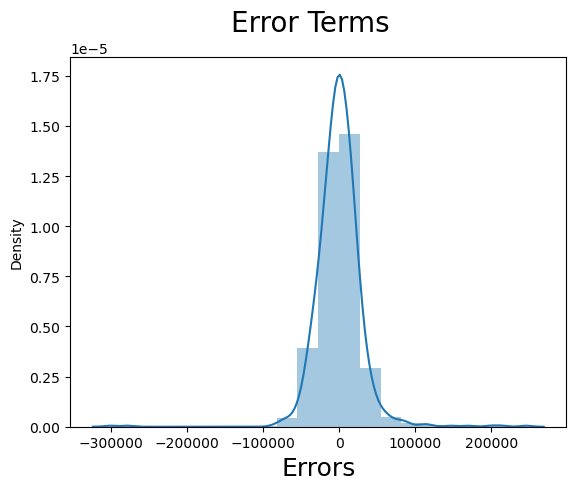

In [1401]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [1402]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.85

In [1403]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

973388703111.8999
953367975.6238002
30876.657455492168


In [1404]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

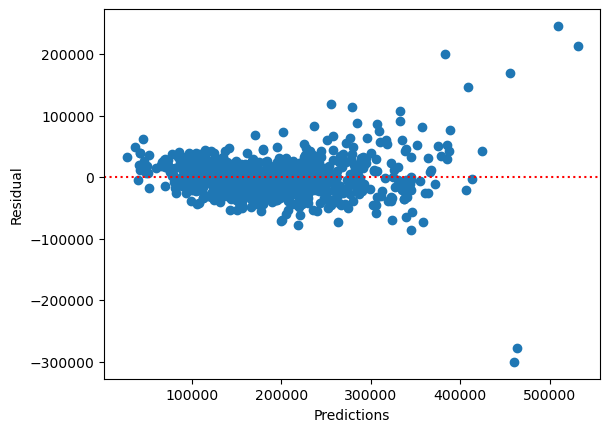

In [1405]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [1406]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [1407]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [1408]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1409]:
#trained model columns
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood',


In [1410]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1411]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [1412]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     46.03
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          3.60e-137
Time:                        20:30:57   Log-Likelihood:                -5134.9
No. Observations:                 439   AIC:                         1.038e+04
Df Residuals:                     383   BIC:                         1.061e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.443e+05   2.24e+04      6.450      0.000       1e+05    1.88e+05
LotFrontage           -680.9133   2001.818     -0.340      0.734   -4616.843    3255.016
OverallQual           1.823e+04   3276.828      5.562      0.000    1.18e+04    2.47e+04
BsmtQual              8837.6940   3288.339      2.688      0.008    2372.237    1.53e+04
BsmtExposure          6654.9210   1957.242      3.400      0.001    2806.636    1.05e+04
TotalBsmtSF           1.412e+04   4548.896      3.105      0.002    5178.627    2.31e+04
1stFlrSF              2.178e+04   4032.036      5.402      0.000    1.39e+04    2.97e+04
2ndFlrSF              1.826e+04   3473.553      5.256      0.000    1.14e+04    2.51e+04
KitchenQual           9188.7580   2238.914      4.104      0.000    4786.656    1.36e+04
GarageCars            1.164e+04   2464.806      4.721      0.000    6790.144    1.65e+04
MSSubClass_45        -6980.0120   1.63e+04     -0.428      0.669   -3.91e+04    2.51e+04
MSSubClass_75         4.402e+04   4.38e+04      1.004      0.316   -4.22e+04     1.3e+05
MSSubClass_90        -3.715e+04   1.17e+04     -3.175      0.002   -6.01e+04   -1.41e+04
MSSubClass_120       -1.829e+04   8099.094     -2.259      0.024   -3.42e+04   -2370.680
MSSubClass_160       -2.447e+04    1.3e+04     -1.877      0.061   -5.01e+04    1167.395
MSSubClass_190        1.894e+04   1.71e+04      1.110      0.268   -1.46e+04    5.25e+04
MSZoning_FV           7.754e+04   2.67e+04      2.899      0.004     2.5e+04     1.3e+05
MSZoning_RH           7645.0496   2.85e+04      0.268      0.789   -4.84e+04    6.37e+04
MSZoning_RL           3.154e+04   2.14e+04      1.473      0.142   -1.06e+04    7.36e+04
MSZoning_RM           2.429e+04   2.11e+04      1.149      0.251   -1.73e+04    6.59e+04
LotConfig_FR2         4149.0372   8764.040      0.473      0.636   -1.31e+04    2.14e+04
Neighborhood_BrDale   1.838e+04   2.12e+04      0.866      0.387   -2.34e+04    6.01e+04
Neighborhood_BrkSide  2.133e+04   8725.020      2.444      0.015    4172.935    3.85e+04
Neighborhood_ClearCr  8161.9671   1.22e+04      0.667      0.505   -1.59e+04    3.22e+04
Neighborhood_Crawfor  3.319e+04   8835.106      3.757      0.000    1.58e+04    5.06e+04
Neighborhood_MeadowV -1.535e+04   1.79e+04     -0.857      0.392   -5.06e+04    1.99e+04
Neighborhood_NoRidge  2.497e+04   1.43e+04      1.743      0.082   -3196.221    5.31e+04
Neighborhood_NridgHt  4.507e+04   8676.737      5.194      0.000     2.8e+04    6.21e+04
Neighborhood_Somerst -4.274e+04   1.48e+04     -2.891      0.004   -7.18e+04   -1.37e+04
Neighborhood_Veenker -1.357e-11   2.04e-11     -0.665      0.507   -5.37e-11    2.66e-11
HouseStyle_1.5Unf    -6980.0120   1.63e+04     -0.428      0.669   -3.91e+04    2.51e+04
HouseStyle_2.5Fin    -7607.6932   4.82e+04     -0.158    

In [1413]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [1414]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.81

In [1415]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

534080861247.7582
1216585105.3479686
34879.58006266659


In [1416]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [1417]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
48,Exterior2nd_MetalSd,32.51
39,Exterior1st_MetalSd,32.44
17,MSZoning_RL,21.65
45,Exterior2nd_CmentBd,19.28
36,Exterior1st_CemntBd,19.17
53,Foundation_PConc,9.59
56,GarageType_Attchd,9.30
37,Exterior1st_HdBoard,9.27
46,Exterior2nd_HdBoard,8.97
52,Foundation_CBlock,7.58


Text(0, 0.5, 'y_pred')

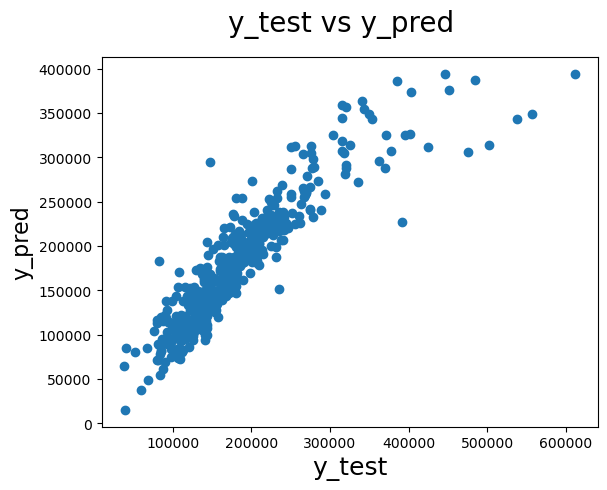

In [1418]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1419]:
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood',


In [1420]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


### Final evalution
- No of Variables = `21` i.e. `OverallQual`,`BsmtUnfSF`, `TotalBsmtSF`,`1stFlrSF`, `2ndFlrSF`, `MSSubClass_90`, `MSSubClass_160`, `MSZoning_RL`, `LotShape_IR3`, `LotConfig_CulDSac`, `Neighborhood_Crawfor` , `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`, `Exterior1st_ImStucc`, `Exterior1st_Stucco`, `Exterior2nd_CmentBd` , `Exterior2nd_ImStucc`, `Exterior2nd_VinylSd`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.80`
- r2 score for Test Data set model = `0.82`

In [1421]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.847475620515723
0.8109933433895047
973388703111.8999
534080861247.7582
953367975.6238002
1216585105.3479686


### Ridge Regression

In [1422]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1423]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [1424]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ -2110.84914644  19331.02715178   7265.93534363   9386.64795628
   2016.2785163   20759.01889901  22098.69925113   9683.17283587
   9544.35252585  -2977.5107341    -601.08903751 -12586.69751652
 -16254.04854739 -17744.95302275  -7193.85467851   6217.06699548
   4675.5750494    8172.8018534   -3861.56282749  -8290.25815288
   4493.78945946   8054.09888325   9240.83862738  21806.28426775
  -2369.23500093  43461.24484947  35728.72095679  15799.42281943
  12534.7020148    -868.62608848  -3699.0862535   -5798.39774776
  -9306.08804221 -10125.53130733  -3771.23718185  -1406.89591852
   1502.22905495  -1211.61173205  -2383.16488201  -2055.14287116
  -4607.63838785  -4353.85919316  -3723.88299141  -1044.35477036
  11264.31807302   3866.95488885    879.52424533   9789.03710625
   1320.36535605    723.3705093    2948.29416131 -12906.29418138
   7014.45416777   2537.49063769  15751.96451954   1956.06728902
   5869.70945965  -7379.82157049   1035.21187606 -11340.78209805
 -11917.72358317]


In [1425]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8394669177679913
0.8220710576767574
1024499094824.8973
502778285490.41296
1003427125.1957859
1145280832.5521936


## Lasso

In [1426]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1427]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1428]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [1429]:
lasso.coef_

array([ -2368.19150156,  18838.0681682 ,   7657.68835278,   9408.81307047,
         1366.72226666,  20814.10848247,  21176.92957001,   9475.43484026,
         9204.32480391,     -0.        ,     -0.        , -13639.45831874,
       -18085.19750522, -20581.92740224,  -6460.31666218,      0.        ,
            0.        ,   7300.59779113,  -2928.63892563,  -8115.86768709,
          459.43860531,   6741.32046284,   9936.79786446,  27047.13818034,
           -0.        ,  57487.899067  ,  44668.58884291,  24712.77071064,
        15886.8606379 ,     -0.        ,     -0.        ,   -196.15981854,
        -7911.57592237, -10264.06847829,     -0.        ,     -0.        ,
            0.        ,      0.        ,     -0.        ,   -312.27049381,
        -2008.71503365,     -0.        ,  -3218.71833824,     -0.        ,
        12529.93264098,   2966.49396975,      0.        ,   7441.68041316,
           -0.        ,     -0.        ,      0.        , -13099.58229937,
         7415.91380404,  

In [1430]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8412153670715428
0.8192205013528573
1013340742266.4702
510833174158.3885
992498278.4196575
1163629098.31068


In [1431]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.474756e-01,8.394669e-01,8.412154e-01
1,R2 Score (Test),8.109933e-01,8.220711e-01,8.192205e-01
2,RSS (Train),9.733887e+11,1.024499e+12,1.013341e+12
3,RSS (Test),5.340809e+11,5.027783e+11,5.108332e+11
4,MSE (Train),3.087666e+04,3.167692e+04,3.150394e+04
5,MSE (Test),3.487958e+04,3.384200e+04,3.411201e+04


## Lets observe the changes in the coefficients after regularization

In [1432]:
betas = pd.DataFrame(index=X.columns)

In [1433]:
betas.rows = X.columns

In [1434]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1435]:
pd.set_option('display.max_rows', None)
#betas.head(68)

betas.sort_values(by='Ridge',ascending=False).head(10)

,Linear,Ridge,Lasso
Neighborhood_NoRidge,61774.386086,43461.244849,57487.899067
Neighborhood_NridgHt,50761.229741,35728.720957,44668.588843
2ndFlrSF,23649.192677,22098.699251,21176.929570
Neighborhood_Crawfor,34990.112973,21806.284268,27047.138180
1stFlrSF,21042.768651,20759.018899,20814.108482
OverallQual,17529.376417,19331.027152,18838.068168
Neighborhood_Somerst,27265.487198,15799.422819,24712.770711
Foundation_Slab,37813.481807,15751.964520,19586.941544
Neighborhood_Veenker,27188.285877,12534.702015,15886.860638
Exterior2nd_BrkFace,18711.186508,11264.318073,12529.932641


# Assignment Part-I Question

# Q1 Which variables are significant in predicting the price of a house, and

- Neighborhood_NoRidge
- Neighborhood_NridgHt
- 2ndFlrSF
- Neighborhood_Crawfor
- 1stFlrSF
- OverallQual
- Neighborhood_Somerst
- Foundation_Slab
- Neighborhood_Veenker
- Exterior2nd_BrkFace

# Q2 How well those variables describe the price of a house.

In [ ]:
Answer-

                   Ridge Regression                Lasso Regression
R2 score(Train)--------- 0.84  ---------------------------0.84

R2 score(Test)-----------0.82  ---------------------------0.82

# Assignment Part-II Question
### Note:- Only code questions are solved in below notebook , all 4 questions are also answered seperately in PDF

### Que1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [1437]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ -1468.10037022  19875.92597077   6710.85204229   9169.69310733
   2733.87492133  20469.58550744  21332.36408184  10099.70689912
   9813.29197262  -1842.37609992  -1008.49328935  -9816.01358052
 -12711.62664526 -13132.59075896  -5321.34875419   4771.99238683
   2298.02199025   6771.92015457  -5820.83379576  -6008.88764151
   2132.37957689   6559.19109907   6660.43780796  16240.782267
  -1405.0841014   34020.68860699  27981.43112683  11193.14030481
   8052.03200754   -886.51516981  -1655.65171834  -3384.35823645
  -7357.37604485  -7601.32271366  -1830.28788741   -648.82803072
   1833.2214947    -756.21497005   -805.41416281  -1314.92446821
  -4066.86835565  -2081.39544058  -3131.21170137  -1203.598591
   7960.26218327   2924.5421875     263.56467117   6104.69865969
    904.18320583    206.62008083   1725.13426448  -9944.27539582
   4969.51378581   1580.95244063  10193.42049807    647.61287854
   4899.00038805  -5164.31598575   -559.17111796 -10151.4197013
 -10532.95610126]
0.8332466349

___Coeff values are increasing as alpha will increase.r2_score of train data is also drop from .84 to 0.82___

In [1438]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ -1563.86427279  19464.80104582   6585.1339216    9261.08840577
   1161.79822829  21192.97461731  20254.47737074   9988.02748409
   9165.34692703     -0.             -0.          -9481.00127234
 -14038.41724557 -15420.52977486  -1700.68177258      0.
      0.           6338.8892425   -4274.85882817  -2861.69887053
      0.           3185.18022655   4087.84419285  21070.18570112
     -0.          53483.53833371  39936.14372387  19648.9553551
   4877.83150432     -0.             -0.             -0.
  -5980.71999613  -4968.93042634     -0.             -0.
      0.              0.             -0.             -0.
     -0.             -0.          -1769.75738118     -0.
   7179.89266933    484.78192224     -0.              0.
     -0.             -0.              0.          -8507.77618774
   3958.80736671      0.           5396.14787088      0.
   5707.54741031     -0.              0.         -10361.8059557
 -11012.2139586 ]
0.835418581890932
0.8181334777074054


___Coeff values are increasing as alpha will increase.r2_score of train data is also drop from 0.84 to 0.83___


### Que3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?
___Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `2ndFlrSF`, `OverallQual`, `Neighborhood_Veenker`___

In [1439]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'Neighborhood_Crawfor'
                               , '1stFlrSF'], axis=1)

In [1440]:
X_test_new = X_test_new.drop([ 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'Neighborhood_Crawfor'
                               ,'1stFlrSF'], axis=1)

In [1441]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1442]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1443]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [1444]:
lasso.coef_

array([   294.6428906 ,  31404.67197819,   3309.91303107,   6961.43747974,
        16730.42792206,  12132.76544916,  13686.46597228, -12651.04818455,
         3072.57738593,  -5162.61813648, -22072.78874164, -31367.51045437,
           -0.        ,      0.        ,      0.        ,   1950.18841361,
        -9967.698005  ,  -8466.69497553,      0.        ,   3432.9361008 ,
        11538.14013312,      0.        ,      0.        ,  10534.44137083,
        -2387.87483481,  20144.24748991,      0.        ,  19933.05846546,
       -18082.62418947,     -0.        ,      0.        ,   5356.95306426,
         -944.61959589,     -0.        ,      0.        ,   -226.66401424,
            0.        ,    530.98168458,     -0.        ,   8128.15570513,
         3029.13842886,   1478.58479055,  16502.35355912,   3691.40990466,
            0.        ,      0.        ,  -8292.33784876,   2494.78071273,
        -1514.65843459,  40203.21373685,      0.        ,  -5106.79422965,
           -0.        ,  

In [1445]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7743145434412781
0.778956345518201


___After dropping the top 5 features model r2 score is very low i.e. 77% for Train and 77% for Test.___

In [1446]:
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_CBlock', 'Foundation_PConc',
       'Foun

___Next top 5 features after drooping 5 main predictors `1stFlrSF` ,`MSSubClass_90`, `MSSubClass_120`, `TotalBsmtSF`, `HouseStyle_1Story`___ 